## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer' )

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(combined_data_df['Mouse ID'].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_mask = combined_data_df[['Mouse ID', 'Timepoint']].duplicated()
duplicate_mice = combined_data_df[duplicate_mice_mask]
duplicate_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

combined_data_df = combined_data_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
len(combined_data_df['Mouse ID'].unique())

249

## Summary Statistics

In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_grouping = combined_data_df.groupby('Drug Regimen')

vol_mean = drug_grouping.mean()['Tumor Volume (mm3)']
vol_std = drug_grouping.std()['Tumor Volume (mm3)']
vol_variance = drug_grouping.var()['Tumor Volume (mm3)']
vol_median = drug_grouping.median()['Tumor Volume (mm3)']
vol_sem = drug_grouping.sem()['Tumor Volume (mm3)']

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

regimen_summary_df = pd.merge(vol_mean, vol_median, on='Drug Regimen')
regimen_summary_df = regimen_summary_df.rename(columns={'Tumor Volume (mm3)_x': 'mean', 'Tumor Volume (mm3)_y': 'median'})
regimen_summary_df = pd.merge(regimen_summary_df, vol_variance, on='Drug Regimen')
regimen_summary_df = regimen_summary_df.rename(columns={'Tumor Volume (mm3)': 'variance'})
regimen_summary_df = pd.merge(regimen_summary_df, vol_std, on='Drug Regimen')
regimen_summary_df = regimen_summary_df.rename(columns={'Tumor Volume (mm3)': 'std'})
regimen_summary_df = pd.merge(regimen_summary_df, vol_sem, on='Drug Regimen')
regimen_summary_df = regimen_summary_df.rename(columns={'Tumor Volume (mm3)': 'sem'})

regimen_summary_df

# Using the aggregation method, produce the same summary statistics in a single line
regimen_summary_df = drug_grouping.agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})

regimen_summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts

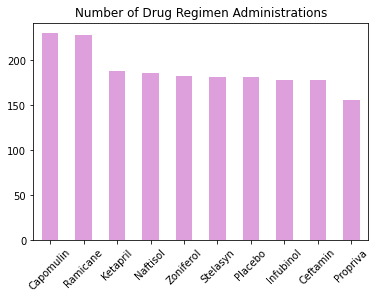

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
num_instances = combined_data_df['Drug Regimen'].value_counts()

num_instances.plot.bar(color='plum', rot=45, title='Number of Drug Regimen Administrations')

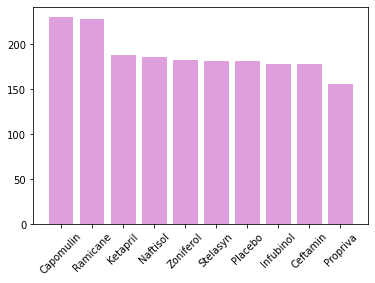

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
num_drugs = np.arange(len(num_instances))
plt.bar(num_drugs, num_instances, color='plum', align='center')
plt.xticks(num_drugs, num_instances.index, rotation=45)
plt.show()

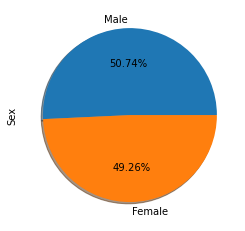

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
distrib_sex = combined_data_df['Sex'].value_counts()
distrib_sex.plot(kind='pie', autopct='%1.2f%%', shadow=True)

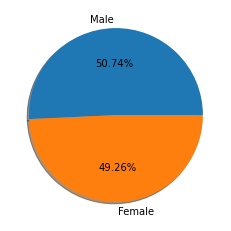

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(distrib_sex, labels=distrib_sex.index, autopct='%1.2f%%', shadow=True)
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

mice_ids = combined_data_df['Mouse ID'].unique()
last_timepoint = []

for mouse in mice_ids:
    mouse_data = combined_data_df[combined_data_df['Mouse ID'] == mouse]
    max_timepoint = mouse_data['Timepoint'].max()
    last_timepoint.append(max_timepoint)
    
final = {'Mouse ID': mice_ids,
         'Timepoint': last_timepoint}

final_tps = pd.DataFrame(final)
    
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# get subset of specifics drugs 

final_timepoint_df = pd.merge(combined_data_df, final_tps, on=['Mouse ID','Timepoint'])

final_timepoint_df = final_timepoint_df[final_timepoint_df['Drug Regimen'] != 'Placebo']
final_timepoint_df = final_timepoint_df[final_timepoint_df['Drug Regimen'] != 'Stelasyn']
final_timepoint_df = final_timepoint_df[final_timepoint_df['Drug Regimen'] != 'Zoniferol']
final_timepoint_df = final_timepoint_df[final_timepoint_df['Drug Regimen'] != 'Ketapril']
final_timepoint_df = final_timepoint_df[final_timepoint_df['Drug Regimen'] != 'Propriva']
final_timepoint_df = final_timepoint_df[final_timepoint_df['Drug Regimen'] != 'Naftisol']

final_timepoint_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [24]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = set(final_timepoint_df['Drug Regimen'])

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments:
    vol = final_timepoint_df.loc[final_timepoint_df['Drug Regimen'] == drug]
    tumor_vol[drug] = vol['Tumor Volume (mm3)']

    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
outlier_bounds = {}
for drug in treatments:
    q1 = tumor_vol[drug].quantile(0.25)
    q3 = tumor_vol[drug].quantile(0.75)
    iqr = q3 - q1
    ub = q3 + (1.5 * iqr)
    lb = q1 - (1.5 * iqr)
    outlier_bounds[drug] = [ub, lb]
    
outliers = {'upper':[], 'lower':[]}
for drug in treatments:
    drug_mask = final_timepoint_df['Drug Regimen'] == drug
    drug_df = final_timepoint_df[drug_mask]
    outlier_mask_ub = drug_df['Tumor Volume (mm3)'] > outlier_bounds[drug][0]
    outlier_mask_lb = drug_df['Tumor Volume (mm3)'] < outlier_bounds[drug][1]
    
    outliers_ub = drug_df[outlier_mask_ub]['Mouse ID'] 
    outliers_lb = drug_df[outlier_mask_lb]['Mouse ID']   
    
    outliers['upper'].append(outliers_ub)
    outliers['lower'].append(outliers_lb) 

print(f"Mouse with ID {outliers['lower'][3][74]} is an outlier given their final timepoint and Tumor Volume")

Mouse with ID c326 is an outlier given their final timepoint and Tumor Volume


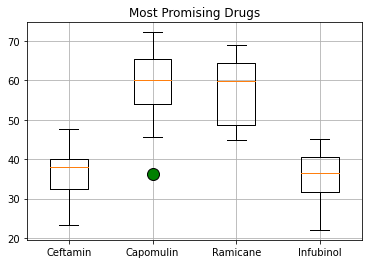

In [33]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = [tumor_vol['Capomulin'], tumor_vol['Infubinol'], tumor_vol['Ceftamin'], tumor_vol['Ramicane']]

fig, ax = plt.subplots()

ax.set_title('Most Promising Drugs')

flierprops = dict(marker='o', markerfacecolor='g', markersize=12,)
ax.boxplot(data, flierprops=flierprops)
plt.xticks([1, 2, 3, 4], treatments)
plt.grid(True)

plt.show()

Despite Ramicane being amongst the most promising treamtents, with regard to effectiveness, its IQR is the largest of the four above treamets. I believe this would imply that of these treatments, Ramicane is the worst at combatting a tumor. Given that this box plot was created using the final tumor volumes, the spread of the Ramicane data shows that this treatment was less effective at reducing the tumor volume the dispersion of the final tumor volumes is vast. On the other hand, the IQR of Ceftamin or Infubinal are relatively "tighter" than Ramicane, implying that those treatments are able to achieve a much narrower range of final tumor volumes. 

## Line and Scatter Plots

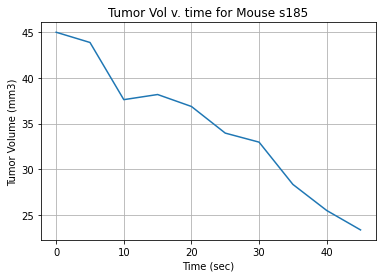

In [26]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mice_df = combined_data_df[combined_data_df['Drug Regimen'] == 'Capomulin']
s185_mouse_data = capomulin_mice_df[capomulin_mice_df['Mouse ID'] == 's185']
time = s185_mouse_data['Timepoint']
vol = s185_mouse_data['Tumor Volume (mm3)']

plt.plot(time, vol)
plt.title('Tumor Vol v. time for Mouse s185')
plt.xlabel('Time (sec)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)

plt.show()

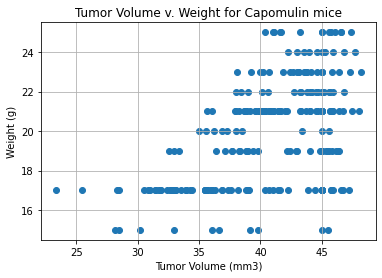

In [27]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
vol = capomulin_mice_df['Tumor Volume (mm3)']
weights = capomulin_mice_df['Weight (g)']

plt.scatter(vol, weights, marker='o')
plt.title('Tumor Volume v. Weight for Capomulin mice')
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.grid(True)
           
plt.show()

The variation of tumor volume for mice treated with Capomulin decreases as their weight increases: mice that are about 17g have tumor volumes between about 20 and 47mm3, whereas mice that are 24g have a tumor volume between about 43 to 47mm3.

## Correlation and Regression

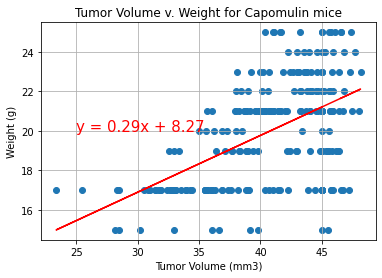

Correlation Coefficient for tumor volume v. weight for mice treated with Capomulin: 0.525699555207717


In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(m, b, r, p, std)= st.linregress(vol , weights)
y_val = m * vol + b
eq = "y = " + str(round(m,2)) + "x + " + str(round(b,2)) 
corr_coeff = st.pearsonr(vol, weights)[0]

plt.scatter(vol, weights, marker='o')
plt.plot(vol, y_val, 'r-')
plt.annotate(eq,(25,20),fontsize=15,color="red")
plt.title('Tumor Volume v. Weight for Capomulin mice')
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.grid(True)

plt.show()

print(f'Correlation Coefficient for tumor volume v. weight for mice treated with Capomulin: {corr_coeff}')

There is a postitve correlation between mice weight and tumor volume